In [3787]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3788]:
health_care = pd.read_csv("healthcare_dataset.csv")
health_care_df = pd.DataFrame(health_care)
health_care_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3789]:
health_care_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [3790]:
health_care_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,4854.000000,5110.000000,5110.000000,4854.000000,4665.000000,5110.000000
mean,36517.829354,43.230128,0.097456,0.054012,106.108706,28.906409,0.048728
std,21161.721625,22.587873,0.296607,0.226063,45.310290,7.863326,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.232500,23.600000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.820000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.142500,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [3791]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                4854 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          4957 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  4854 non-null   float64
 9   bmi                4665 non-null   float64
 10  smoking_status     4957 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3792]:
health_care_df.isnull().sum()

id                     0
gender                 0
age                  256
hypertension           0
heart_disease          0
ever_married           0
work_type            153
Residence_type         0
avg_glucose_level    256
bmi                  445
smoking_status       153
stroke                 0
dtype: int64

In [3793]:
health_care_df.duplicated().sum()

np.int64(0)

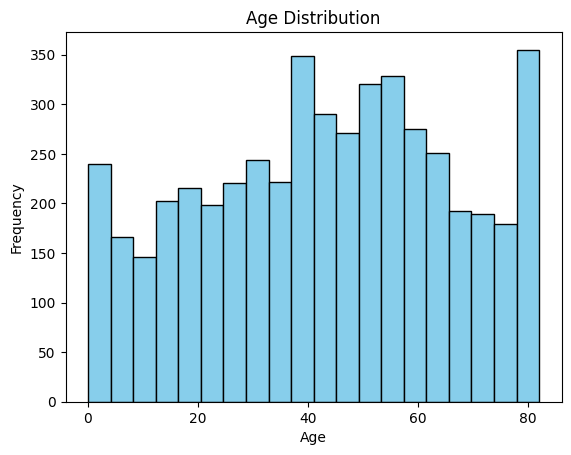

In [3794]:
plt.hist(health_care_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [3795]:
health_care_df['age'] = health_care_df['age'].round()

In [3796]:
health_care_df['age'].unique()

array([67., 61., 80., 49., 79., 81., 74., 69., nan, 78., 54., 50., 64.,
       75., 60., 57., 71., 52., 65., 58., 42., 82., 48., 72., 63., 76.,
       39., 77., 73., 56., 45., 70., 59., 66., 51., 68., 47., 53., 38.,
       55.,  1., 46., 32., 14.,  3.,  8., 37., 40., 35., 20., 44., 25.,
       23., 17., 13.,  4., 16., 22., 27., 43., 30., 29., 11., 21., 18.,
       33., 24., 34., 36., 41.,  5., 26., 31., 12., 62.,  2.,  7.,  9.,
       15., 28., 10.,  0., 19.,  6.])

In [3797]:
health_care_df['age'] = health_care_df['age'].fillna(health_care_df['age'].mean())

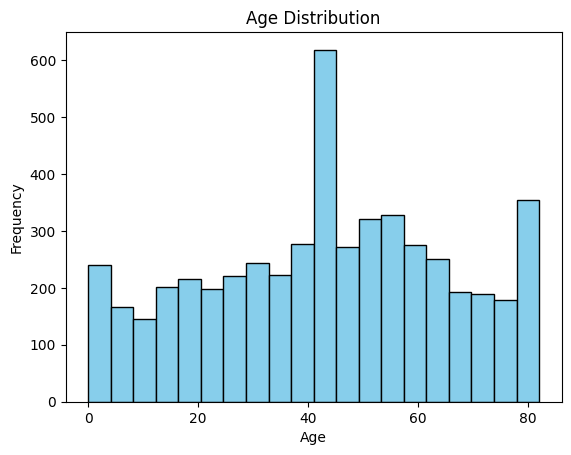

In [3798]:
plt.hist(health_care_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [3799]:
health_care_df['work_type'].unique()

array(['Private', 'Self-employed', nan, 'Govt_job', 'children',
       'Never_worked'], dtype=object)

In [3800]:
health_care_df['work_type'].value_counts()

work_type
Private          2840
Self-employed     793
children          662
Govt_job          640
Never_worked       22
Name: count, dtype: int64

In [3801]:
health_care_df['work_type'].isnull().sum()

np.int64(153)

In [3802]:
health_care_df['work_type'] = health_care_df['work_type'].fillna(health_care_df['work_type'].mode()[0])

In [3803]:
health_care_df['work_type'].isnull().sum()

np.int64(0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24672\3301365861.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=health_care_df['work_type'], palette='viridis')


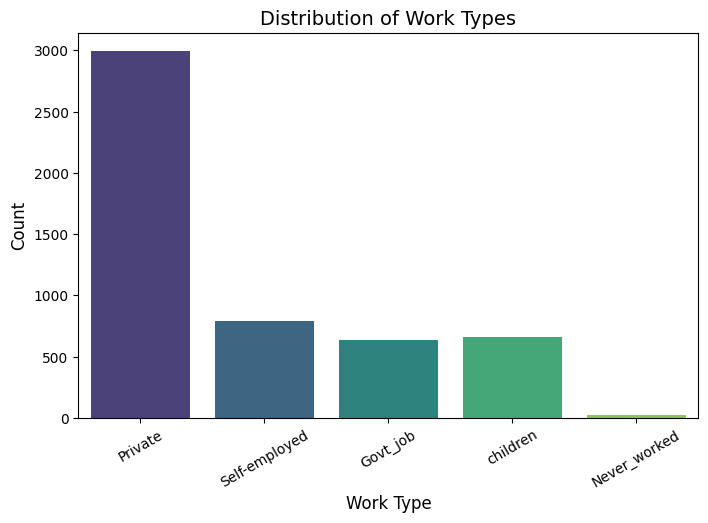

In [3804]:
plt.figure(figsize=(8,5))


sns.countplot(x=health_care_df['work_type'], palette='viridis')

plt.title("Distribution of Work Types", fontsize=14)
plt.xlabel("Work Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=30)

plt.show()

In [3805]:
health_care_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  4854 non-null   float64
 9   bmi                4665 non-null   float64
 10  smoking_status     4957 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3806]:
health_care_df["avg_glucose_level"] = health_care_df["avg_glucose_level"].fillna(health_care_df["avg_glucose_level"].median())


In [3807]:
health_care_df['avg_glucose_level'].describe()

count    5110.000000
mean      105.392873
std        44.270397
min        55.120000
25%        77.930000
50%        91.820000
75%       112.325000
max       271.740000
Name: avg_glucose_level, dtype: float64

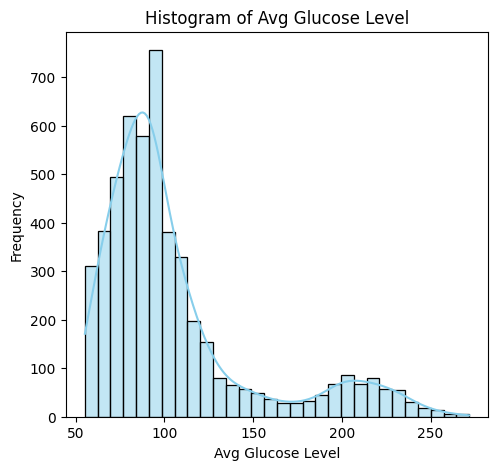

<Figure size 600x500 with 0 Axes>

In [3808]:

plt.figure(figsize=(12,5))
# Histogram
plt.subplot(1,2,1)
sns.histplot(health_care_df['avg_glucose_level'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Avg Glucose Level")
plt.xlabel("Avg Glucose Level")
plt.ylabel("Frequency")
plt.figure(figsize=(6,5))
plt.tight_layout()
plt.show()


In [3809]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4665 non-null   float64
 10  smoking_status     4957 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3810]:
health_care_df['bmi'] = health_care_df['bmi'].fillna(health_care_df['bmi'].median())

In [3811]:
Q1 = health_care_df['bmi'].quantile(0.25)
Q3 = health_care_df['bmi'].quantile(0.75)
IQR = Q3 - Q1
l = Q1 - 1.5 * IQR
u = Q3 + 1.5 * IQR
print(l)
print(u)
outliers = (health_care_df['bmi']<l) |(health_care_df['bmi']>u)
health_care_df['bmi'] = np.where(outliers, health_care_df['bmi'].median(), health_care_df['bmi'])

11.500000000000004
45.099999999999994


In [3812]:
health_care_df['bmi'].describe()

count    5110.000000
mean       28.161448
std         6.242514
min        12.000000
25%        24.100000
50%        28.100000
75%        31.800000
max        45.000000
Name: bmi, dtype: float64

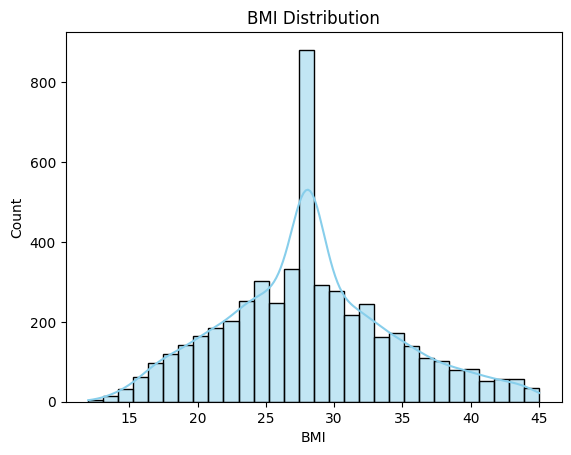

In [3813]:
sns.histplot(health_care_df['bmi'], bins=30, kde=True, color='skyblue')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()


In [3814]:
health_care_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status       153
stroke                 0
dtype: int64

In [3815]:
health_care_df['smoking_status'].value_counts()

smoking_status
never smoked       1835
Unknown            1492
formerly smoked     864
smokes              766
Name: count, dtype: int64

In [3816]:
health_care_df.loc[health_care_df['age'] < 16, 'smoking_status'] = "never smoked"

In [3817]:
health_care_df['smoking_status'].value_counts()

smoking_status
never smoked       2455
Unknown             894
formerly smoked     845
smokes              763
Name: count, dtype: int64

In [3818]:
health_care_df['smoking_status']=health_care_df['smoking_status'].fillna("Unknown")

In [3819]:
health_care_df['smoking_status'].value_counts()

smoking_status
never smoked       2455
Unknown            1047
formerly smoked     845
smokes              763
Name: count, dtype: int64

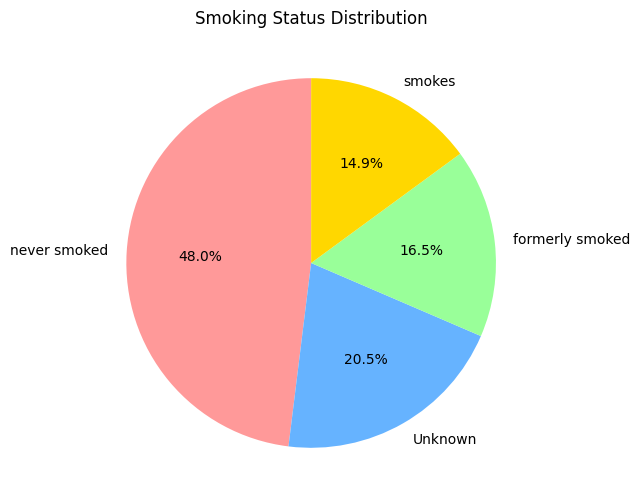

In [3820]:
health_care_df['smoking_status'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=["#FF9999","#66B3FF","#99FF99","#FFD700"], 
    startangle=90, figsize=(6,6))
plt.title("Smoking Status Distribution")
plt.ylabel("")  # Remove y-label for cleaner look
plt.show()


In [3821]:
health_care_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Feature Engineering

In [3822]:
def classify_age(age):
    if age < 40:
        return  "Young"
    elif age < 60:
        return  "Middle-aged"
    else:
        return  "Elderly"

health_care_df['age_category'] = health_care_df['age'].apply(classify_age)


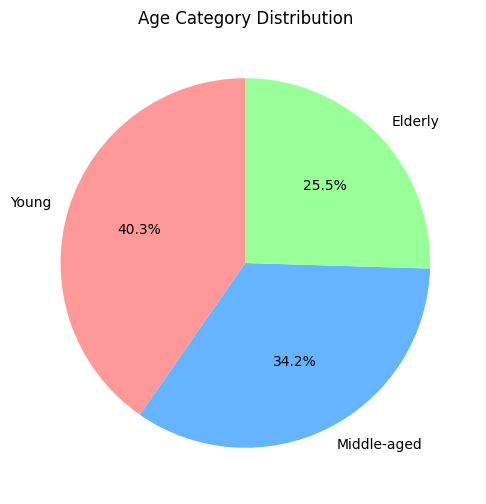

In [3823]:
plt.figure(figsize=(6, 6))
colors = ["#FF9999", "#66B3FF", "#99FF99"]
health_care_df["age_category"].value_counts().plot.pie(
    autopct='%1.1f%%', colors=colors, startangle=90
)
plt.title("Age Category Distribution")
plt.ylabel("")  # Remove y-label for a cleaner look
plt.show()
#"#FF9999","#66B3FF","#99FF99","#FFD700"

In [3824]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return " Normal Weight"
    elif bmi < 30:
        return  "Overweight"
    else:
        return "Obese" 

health_care_df['bmi_category'] = health_care_df['bmi'].apply(classify_bmi)


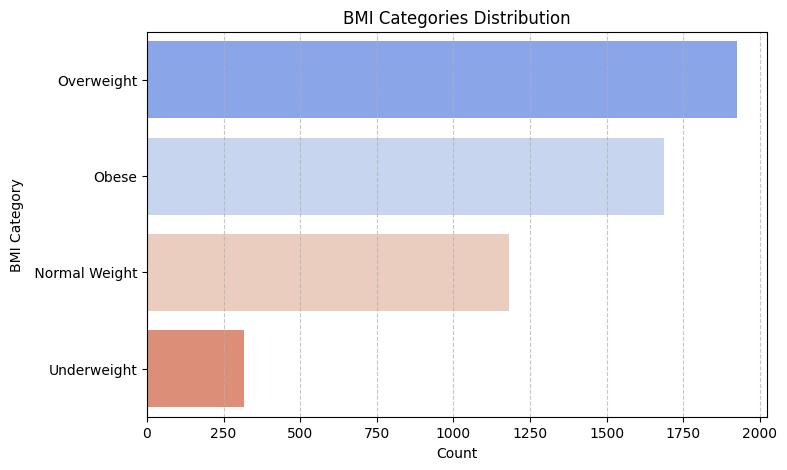

In [3825]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=health_care_df["bmi_category"].value_counts().values, 
    y=health_care_df["bmi_category"].value_counts().index, 
    hue=health_care_df["bmi_category"].value_counts().index, 
     
    palette="coolwarm"
)
plt.xlabel("Count")
plt.ylabel("BMI Category")
plt.title("BMI Categories Distribution")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [3826]:
# Define a function to categorize glucose levels
def categorize_glucose(value):
    if value < 70:
        return  "Low"
    elif 70 <= value <= 99:
        return "Normal"
    elif 100 <= value <= 125:
        return  "Prediabetes"
    elif 126 <= value <= 199:
        return "Diabetes"
    else:
        return "Severe Diabetes"

# Apply the function to create a new categorical column
health_care_df["glucose_category"] = health_care_df["avg_glucose_level"].apply(categorize_glucose)




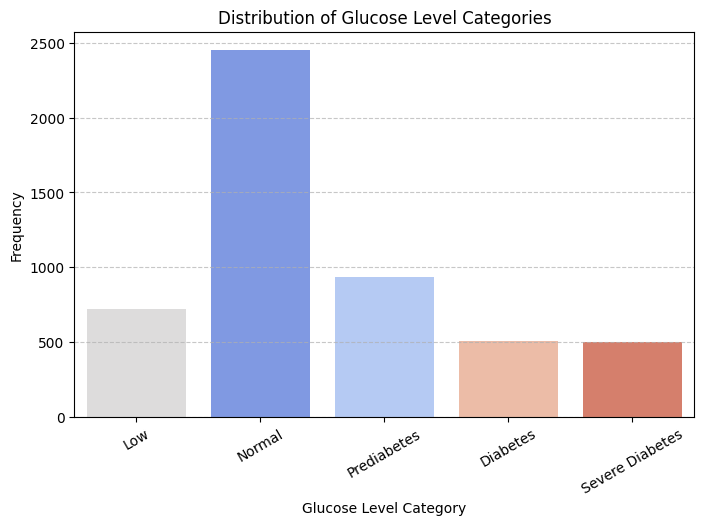

In [3827]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct order of categories
category_order = ["Low", "Normal", "Prediabetes", "Diabetes", "Severe Diabetes"]

# Count occurrences of each glucose category
category_counts = health_care_df["glucose_category"].value_counts()

# Convert to DataFrame for proper plotting
category_df = category_counts.reset_index()
category_df.columns = ["glucose_category", "count"]

# Plot a bar chart with predefined order
plt.figure(figsize=(8, 5))
sns.barplot(data=category_df, x="glucose_category", y="count", hue="glucose_category", palette="coolwarm", order=category_order, legend=False)

# Add labels and title
plt.xlabel("Glucose Level Category")
plt.ylabel("Frequency")
plt.title("Distribution of Glucose Level Categories")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Encoding

In [3828]:
health_care_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  age_category       5110 non-null   object 
 13  bmi_category       5110 non-null   object 
 14  glucose_category   5110 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 599.0+ KB


In [3829]:
health_care_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
age_category          object
bmi_category          object
glucose_category      object
dtype: object

In [3830]:
health_care_df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [3831]:
map_gender = {'Male' : 0b00 ,'Female': 0b01 ,'Other': 0b10}
health_care_df['gender'] = health_care_df['gender'].map(map_gender)

In [3832]:
health_care_df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [3833]:
map_work_type = {'Private' : 0, 'Self-employed' : 1 , 'Govt_job' : 2 , 'children' : 3 , 'Never_worked' : 4}
health_care_df['work_type'] = health_care_df['work_type'].map(map_work_type)

In [3834]:
health_care_df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [3835]:
map_ever_married = {'Yes': 1,'No' : 0 }
health_care_df['ever_married'] =health_care_df['ever_married'].map(map_ever_married)

In [3836]:
health_care_df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [3837]:
map_residence_type = {'Urban' : 0 , 'Rural' : 1}
health_care_df['Residence_type'] =health_care_df['Residence_type'].map(map_residence_type)

In [3838]:
health_care_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [3839]:
map_smoking_status = {'formerly smoked' : 0 , 'never smoked' : 1 , 'smokes' : 2,'Unknown':-1}
health_care_df['smoking_status'] =health_care_df['smoking_status'].map(map_smoking_status)

In [3840]:
health_care_df['age_category'].unique()

array(['Elderly', 'Middle-aged', 'Young'], dtype=object)

In [3841]:
map_age_category={"Young":0,'Middle-aged':1,'Elderly':2}
health_care_df['age_category']=health_care_df['age_category'].map(map_age_category)

In [3842]:
health_care_df['glucose_category'].unique()

array(['Severe Diabetes', 'Prediabetes', 'Diabetes', 'Normal', 'Low'],
      dtype=object)

In [3843]:
map_glucose_category={'Low':0,'Normal':1,'Diabetes':2, 'Prediabetes':3,'Severe Diabetes':4}
health_care_df['glucose_category']=health_care_df['glucose_category'].map(map_glucose_category)

In [3844]:
health_care_df['bmi_category'].unique()

array(['Obese', 'Overweight', ' Normal Weight', 'Underweight'],
      dtype=object)

In [3845]:
map_bmi_category={'Obese':3, 'Overweight':2, ' Normal Weight':1, 'Underweight':0}
health_care_df['bmi_category']=health_care_df['bmi_category'].map(map_bmi_category)

In [3846]:
health_care_df.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
age_category           int64
bmi_category           int64
glucose_category       int64
dtype: object

In [3847]:
health_care_df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.586301,43.230326,0.097456,0.054012,0.656164,0.811546,0.491977,105.392873,28.161448,0.574168,0.048728,0.851468,1.975147,1.616047
std,21161.721625,0.492941,22.014411,0.296607,0.226063,0.475034,1.110240,0.499985,44.270397,6.242514,0.976269,0.215320,0.797611,0.898863,1.211826
min,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.930000,24.100000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,36932.000000,1.000000,43.230326,0.000000,0.000000,1.000000,0.000000,0.000000,91.820000,28.100000,1.000000,0.000000,1.000000,2.000000,1.000000
75%,54682.000000,1.000000,60.000000,0.000000,0.000000,1.000000,2.000000,1.000000,112.325000,31.800000,1.000000,0.000000,2.000000,3.000000,3.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,45.000000,2.000000,1.000000,2.000000,3.000000,4.000000


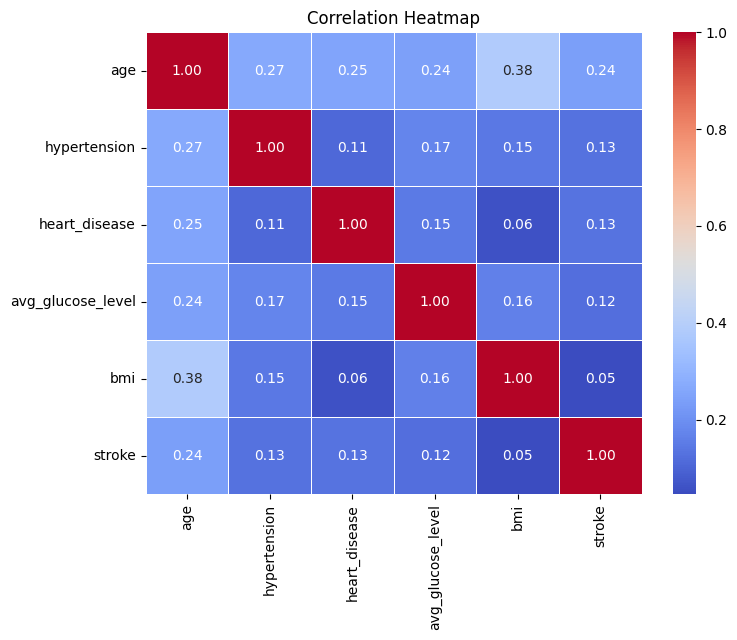

In [3848]:

numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
corr_matrix = health_care_df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Normalization

In [3849]:
scaler = MinMaxScaler()
health_care_df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(health_care_df[['age', 'avg_glucose_level', 'bmi']])

# Age , Avg_glucose_level , Bmi is normalized from 0 -> 1

In [3850]:
health_care_df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.586301,0.527199,0.097456,0.054012,0.656164,0.811546,0.491977,0.232079,0.489741,0.574168,0.048728,0.851468,1.975147,1.616047
std,21161.721625,0.492941,0.268468,0.296607,0.226063,0.475034,1.110240,0.499985,0.204369,0.189167,0.976269,0.215320,0.797611,0.898863,1.211826
min,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,0.000000,0.317073,0.000000,0.000000,0.000000,0.000000,0.000000,0.105300,0.366667,0.000000,0.000000,0.000000,1.000000,1.000000
50%,36932.000000,1.000000,0.527199,0.000000,0.000000,1.000000,0.000000,0.000000,0.169421,0.487879,1.000000,0.000000,1.000000,2.000000,1.000000
75%,54682.000000,1.000000,0.731707,0.000000,0.000000,1.000000,2.000000,1.000000,0.264080,0.600000,1.000000,0.000000,2.000000,3.000000,3.000000
max,72940.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,4.000000


In [3851]:
health_care_df.to_csv("cleaned_data.csv", index=False)